In [1]:
# %matplotlib notebook
import matplotlib
from matplotlib import style
matplotlib.use('nbagg')
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime as dt, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base

from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


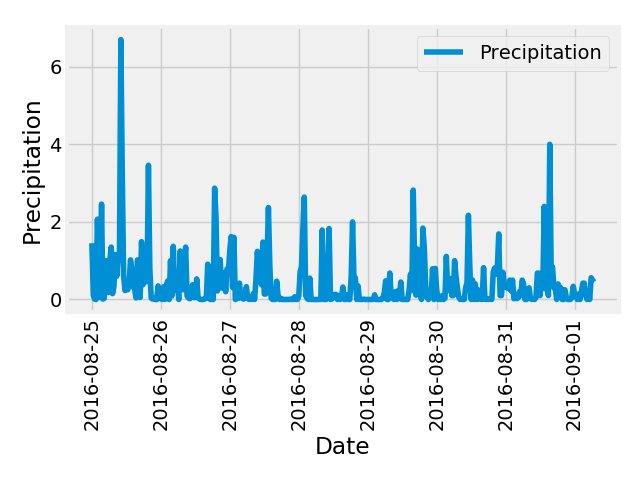

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
#Get the latest date to timedelta last 12 months
current_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).all()[0][0]

#convert to datetime to ude timedelta
current_date = dt.strptime(current_date_str, '%Y-%m-%d')

query_date = current_date - timedelta(days = 365)
# Perform a query to retrieve the date and precipitation scores

select = [Measurement.date, Measurement.prcp]
prcp_data = session.query(*select).filter(Measurement.date >= query_date).group_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns = ['Date', 'Precipitation'])
# Sort the dataframe by date
prcp_df.sort_values(by = 'Date', inplace = True)
prcp_df.set_index('Date', drop=True, inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot(use_index=True)
plt.xlabel("Date")
plt.ylabel("Precipitation")
# Rotate the xticks for the dates
ax.set_xticklabels(prcp_df.index.get_level_values("Date"),rotation = 'vertical')
plt.savefig("prcpdat_pastyear.png",bbox_inches='tight')
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,365.000000
mean,0.406493
std,0.691942
min,0.000000
25%,0.000000
50%,0.110000
75%,0.530000
max,6.700000


# Station Analysis

In [12]:
# How many stations are available in this dataset?
number_of_stations = session.query(Station.id).count()
print(f'There are {number_of_stations} stations')

There are 9 stations


In [13]:
# What are the most active stations?
sel = [Measurement.station, func.count(Measurement.tobs)]
active_station = session.query(*sel).group_by(Measurement.station).order_by(desc(func.count(Measurement.tobs))).all()
# List the stations and the counts in descending order.
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
#station with highest observations
highest_station_obs = active_station[0][0]
print(f'station with highest observations is: {highest_station_obs}')

station with highest observations is: USC00519281


In [17]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.tobs]
tobs_data = session.query(*sel).filter(Measurement.date >= query_date).filter(Measurement.station == highest_station_obs).all()


print((tobs_data))
hist_data = []

#generate single dimension tobs data for generating the histogram
for tobs in tobs_data:
    hist_data.append(tobs[0])

print(hist_data)

[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

# Generate Histogram

<IPython.core.display.Javascript object>


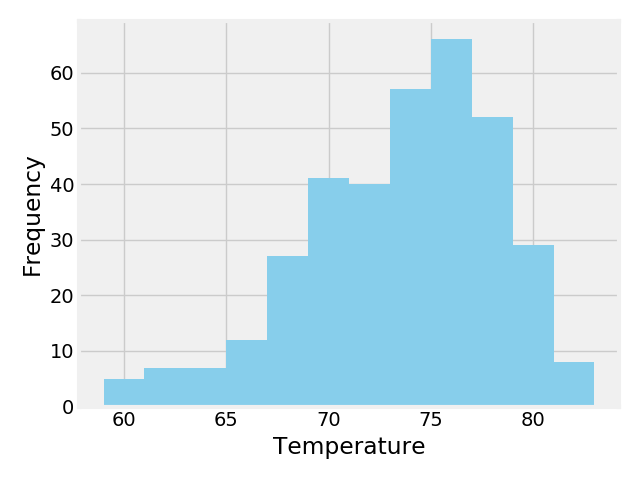

In [20]:
plt.hist(hist_data, bins=12, label='tobs', color = 'skyblue')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("stationtobs_pastyear.png", bbox_inches='tight')
plt.tight_layout()
plt.show()